In [1]:
import numpy as np
from library_dicom.dicom_processor.tools.create_mip import *
import matplotlib.pyplot as plt
from radiomics.featureextractor import *
from sklearn import mixture

from library_dicom.post_processing.PostProcess_Reader import PostProcess_Reader
from library_dicom.post_processing.Mask4D import Mask4D
from library_dicom.post_processing.GaussianModel import GaussianModel

In [2]:
import SimpleITK as sitk  
mask_path = r'C:\Users\wendy\Documents\STAGE\gained\1.2.250.1.74.20130607110000.4000014017745_nifti_mask.nii'
pet_path = r'C:\Users\wendy\Documents\STAGE\gained\1.2.250.1.74.20130607110000.4000014017745_nifti_PT.nii'

In [3]:
model = PostProcess_Reader(mask_path, pet_path, type = '4d')

In [4]:
parameters = model.gaussien_mixture_model()

AttributeError: 'PostProcess_Reader' object has no attribute 'gaussien_mixture_model'

In [5]:
parameters[1]

{'best_n_components': 4,
 'best_cv_type': 'full',
 'label': array([3, 3, 3, ..., 0, 0, 0], dtype=int64)}

In [6]:
for i in range(1,11):
    print('key : {}, volume : {}'.format(i, model.features[i]['volume']))

key : 1, volume : 165.504
key : 2, volume : 6.4
key : 3, volume : 21.632
key : 4, volume : 318.336
key : 5, volume : 15.36
key : 6, volume : 22.464000000000002
key : 7, volume : 13.824
key : 8, volume : 785.28
key : 9, volume : 5.824
key : 10, volume : 6.72


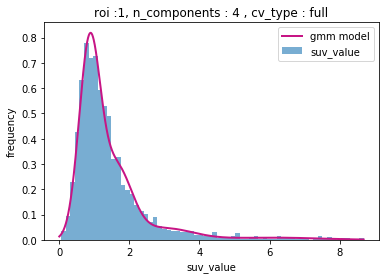

In [7]:
model.get_histogram_best_model(1)

In [8]:
for i in range(1,11):
    print('key : {}, n _components : {}'.format(i, parameters[i]['best_n_components']))

key : 1, n _components : 4
key : 2, n _components : 1
key : 3, n _components : 1
key : 4, n _components : 5
key : 5, n _components : 1
key : 6, n _components : 1
key : 7, n _components : 1
key : 8, n _components : 6
key : 9, n _components : 1
key : 10, n _components : 1


In [7]:
model.number_of_roi_after_model()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22])

In [8]:
cluster = model.new_clusters()

In [9]:
mask = model.new_labelled_mask()

In [10]:
mask.shape

(169, 169, 255)

for i in range(1,22) : 
    x,y,z = np.where(mask == i)
    new_mask_3D = np.zeros((169, 169, 255))
    for j in range(len(x)): 

        new_mask_3D[x[j], y[j], z[j]] = 10
    mip_imshow(new_mask_3D, 0)

In [4]:
import SimpleITK as sitk 

In [ ]:
#2 MOYENS POUR LABELLISE MASK BINAIRE

In [ ]:
#SCIKIT LEARN LABEL

In [4]:
model.number_of_label

53

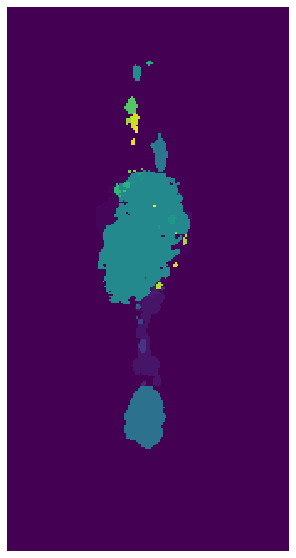

In [5]:
mip_imshow(model.labelled_mask, 0, 'viridis', 'mask')

In [ ]:
#SIMPLE ITK CONNECTED COMPONENT

In [4]:
labelled = sitk.ConnectedComponent(model.binary_mask_img)

In [7]:
stats = sitk.LabelIntensityStatisticsImageFilter()
stats.Execute(labelled, model.pet_img)

In [8]:
stats.GetLabels()

(1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53)

In [9]:
for label in stats.GetLabels() : 
    print('label : {}, number_pixels : {}, centroid : {}'.format(label, stats.GetNumberOfPixels(label), stats.GetCentroid(label)))

label : 1, number_pixels : 5442, centroid : (31.042450573636245, -189.516581452975, -1245.3577728776186)
label : 2, number_pixels : 111, centroid : (-16.998717024519635, -171.46379405528575, -1282.7432432432433)
label : 3, number_pixels : 184, centroid : (-49.64955819171405, -170.79515913258427, -1224.836956521739)
label : 4, number_pixels : 33, centroid : (-45.17829895019531, -192.67186482747394, -1195.8636363636365)
label : 5, number_pixels : 10355, centroid : (2.0940637828876447, -185.99459967067543, -992.7054080154514)
label : 6, number_pixels : 80, centroid : (-37.185369682312, -193.65613212585453, -1119.85)
label : 7, number_pixels : 20, centroid : (-33.57073287963868, -199.86719818115233, -1075.9)
label : 8, number_pixels : 2, centroid : (-24.81414794921875, -207.60557556152344, -1069.0)
label : 9, number_pixels : 7, centroid : (-21.323150634765625, -204.1145782470703, -1049.9285714285716)
label : 10, number_pixels : 1, centroid : (-4.4499969482421875, -207.60557556152344, -1046

In [9]:
sitk.Image.TransformPhysicalPointToIndex(labelled, stats.GetCentroid(1 ))

(92, 81, 80)

In [5]:
array_1 = sitk.GetArrayFromImage(labelled).transpose()

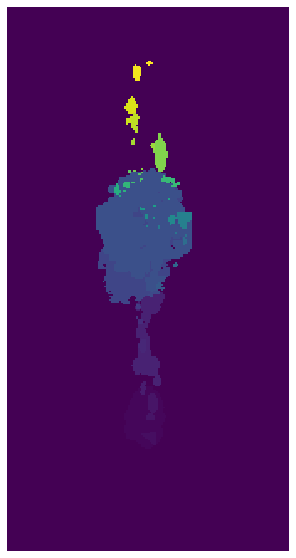

In [85]:
mip_imshow(array_1, 0, cmap = 'viridis', type='mask')

In [11]:
model.number_of_label

53

In [9]:
array_1.shape

(168, 168, 324)

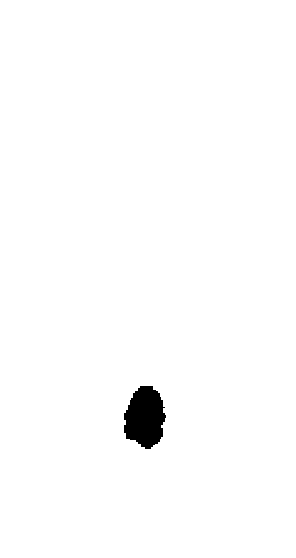

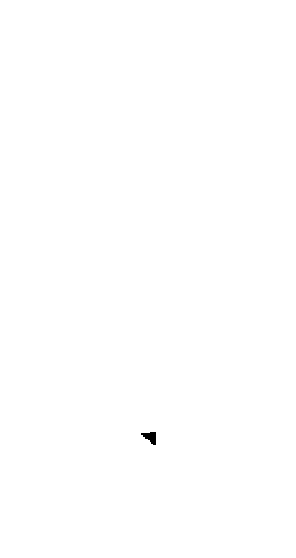

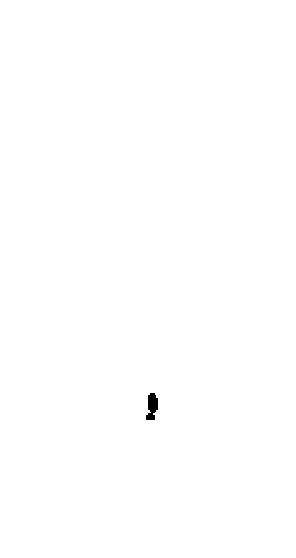

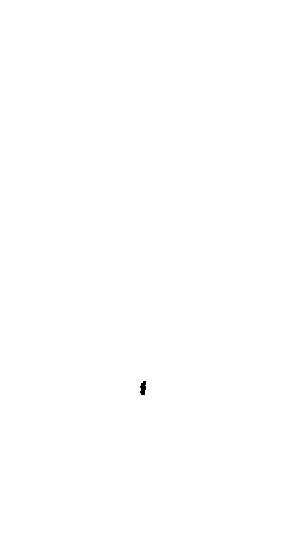

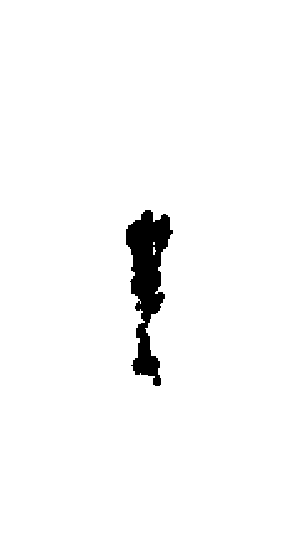

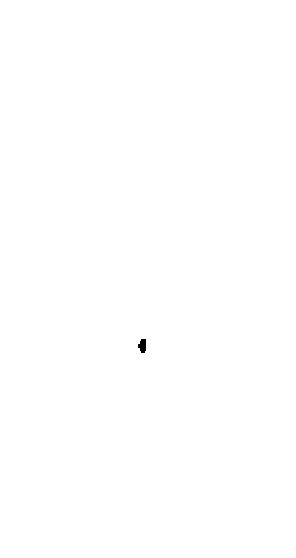

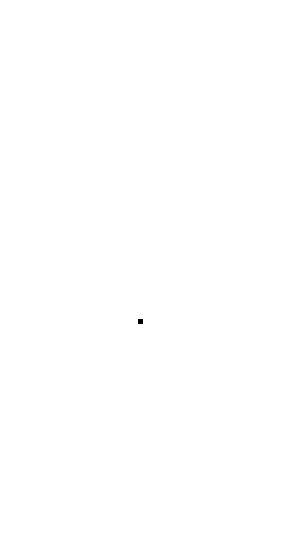

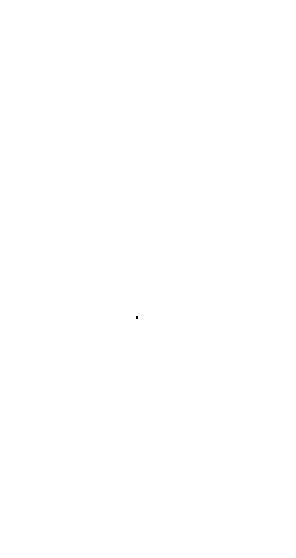

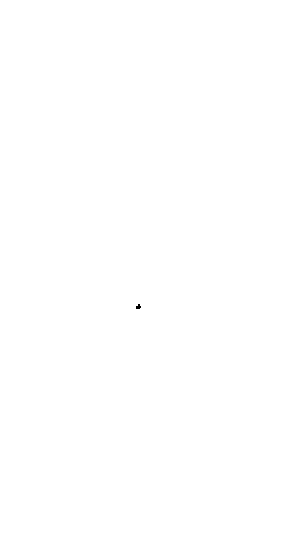

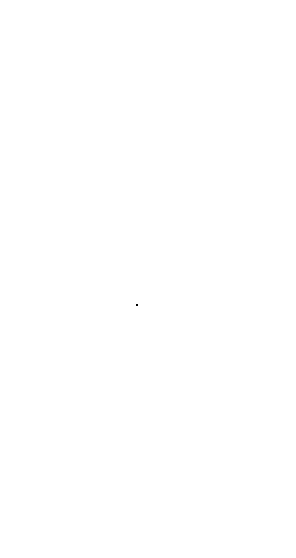

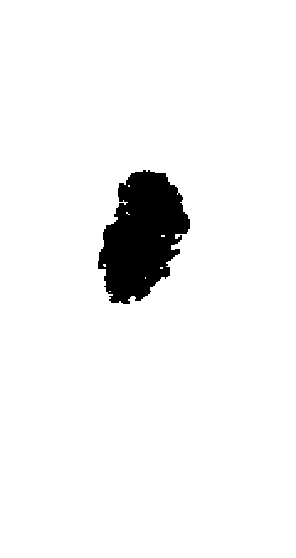

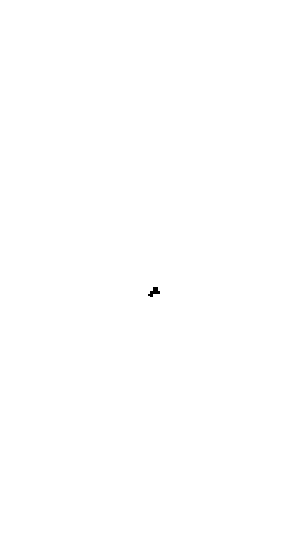

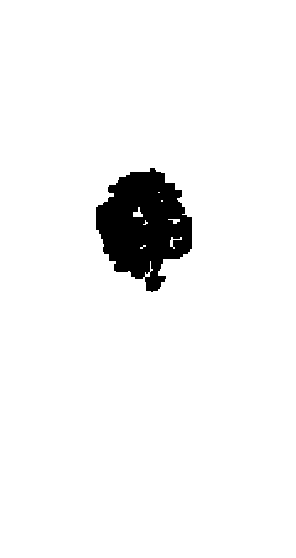

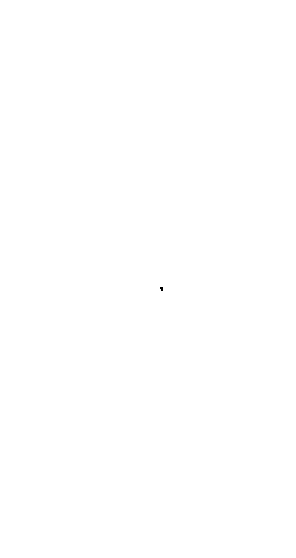

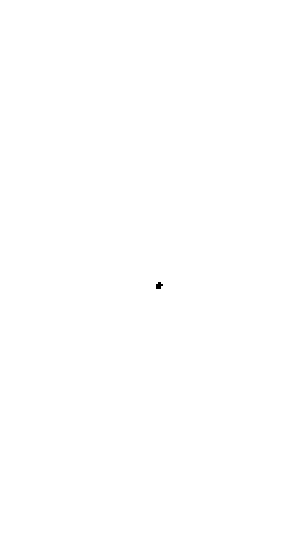

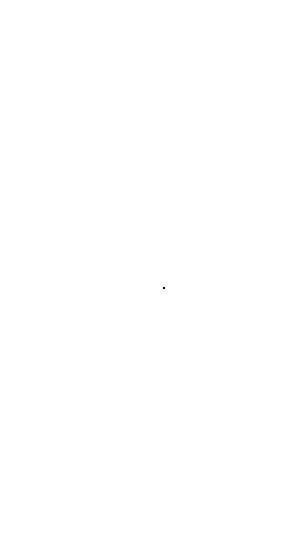

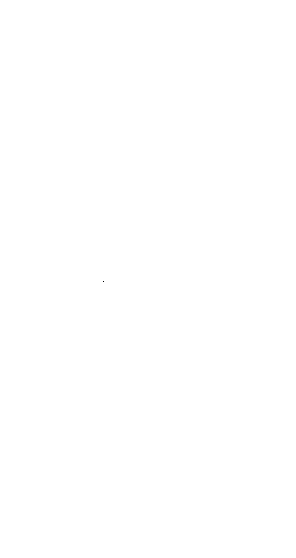

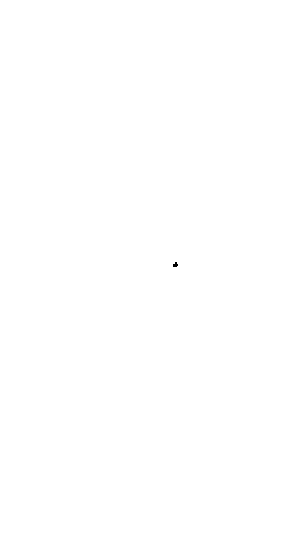

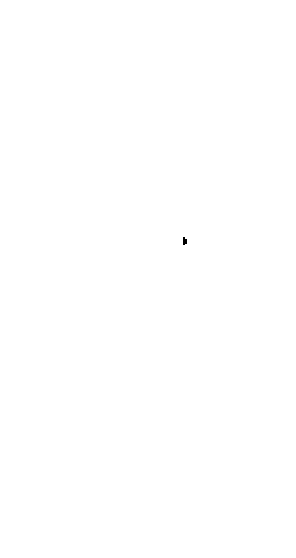

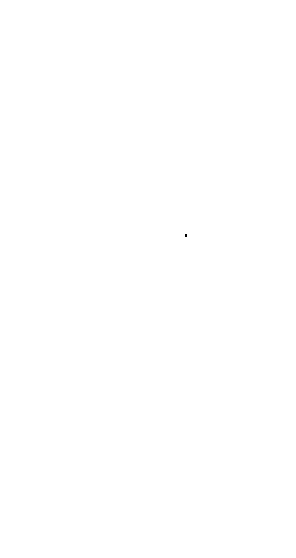

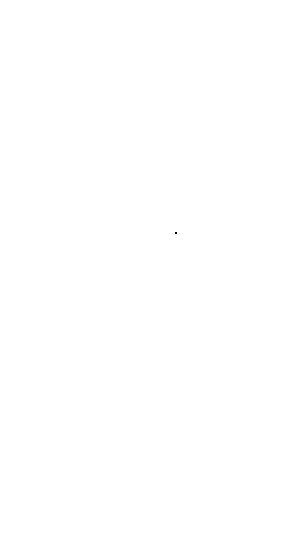

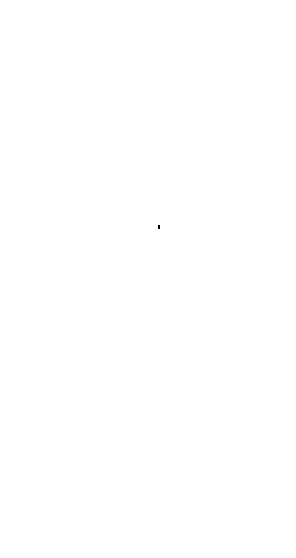

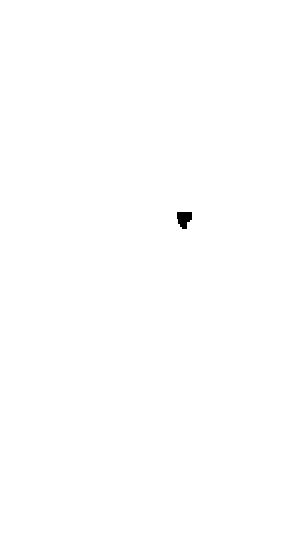

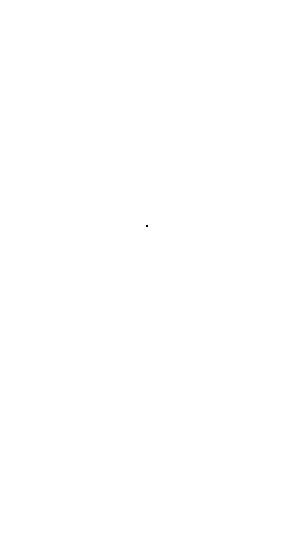

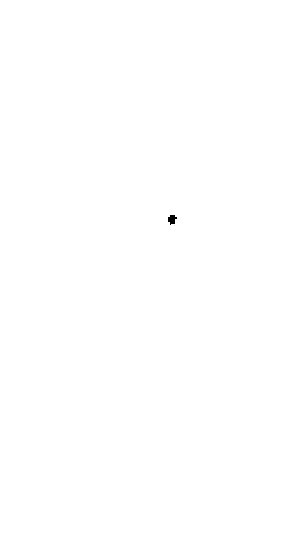

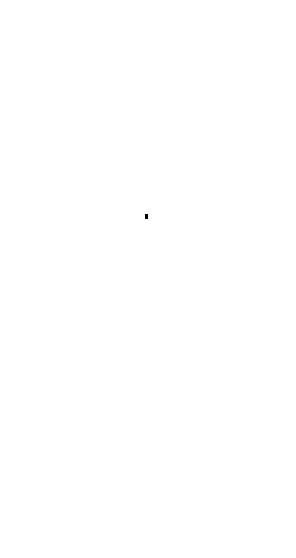

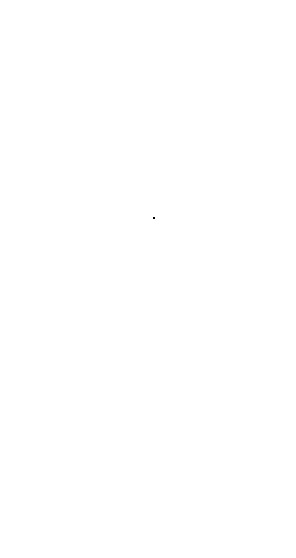

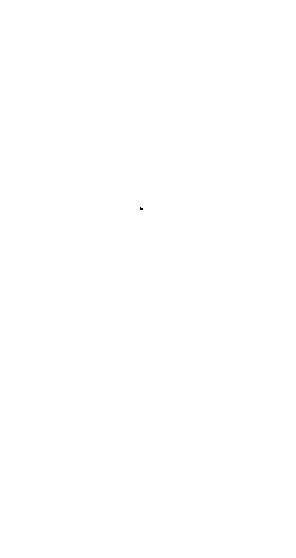

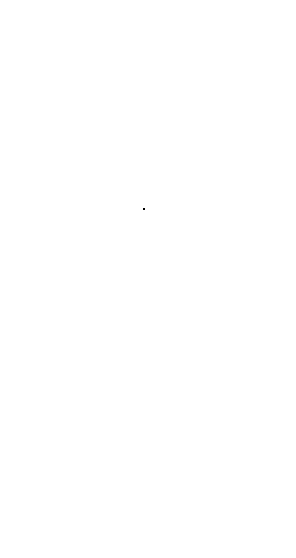

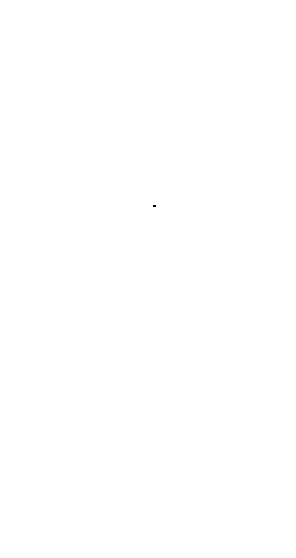

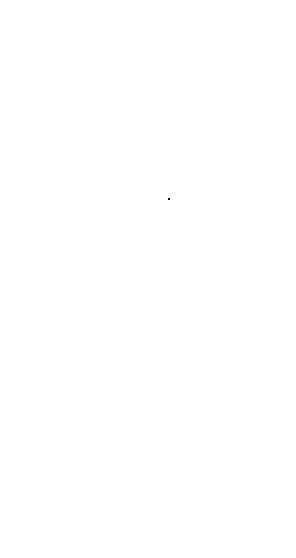

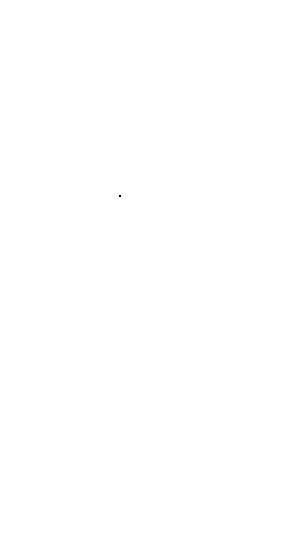

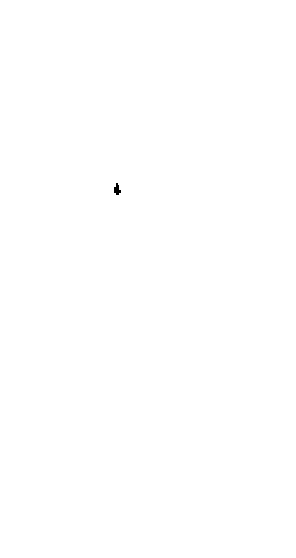

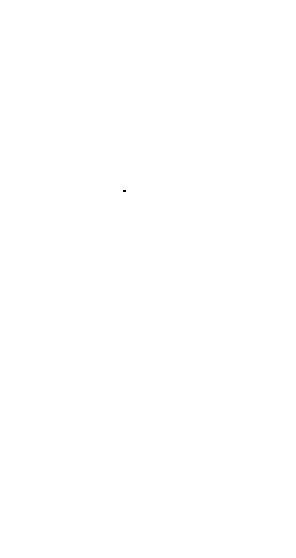

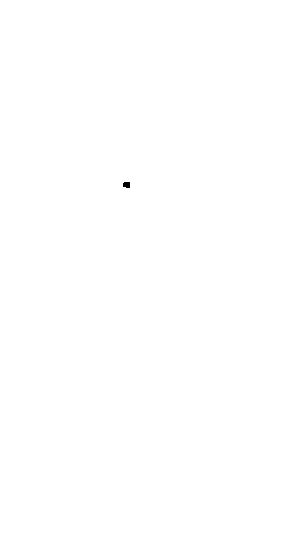

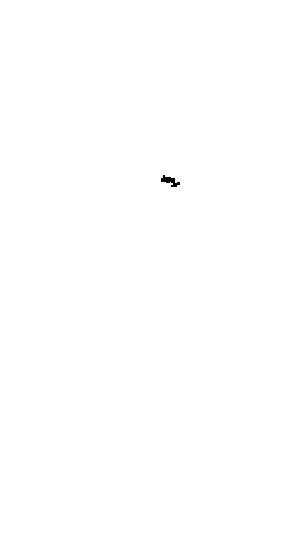

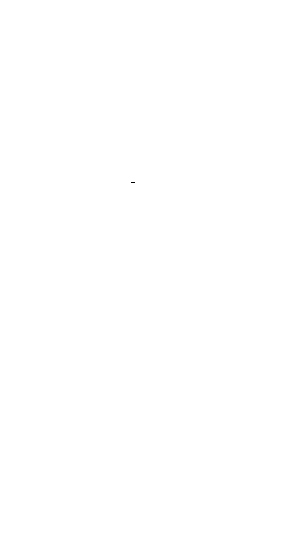

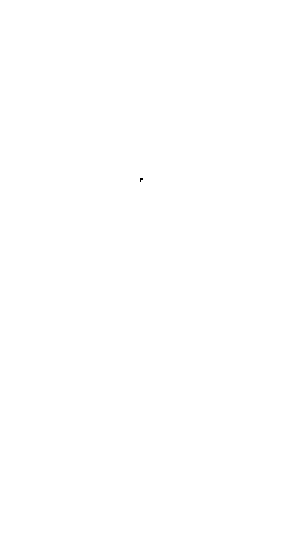

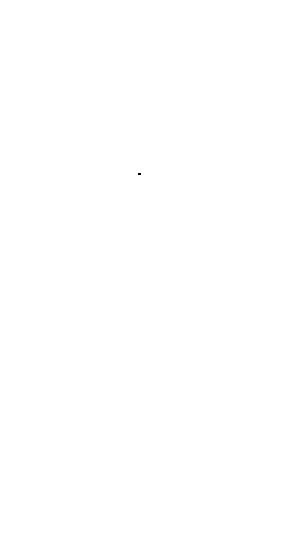

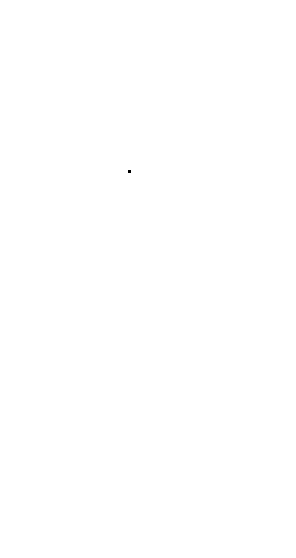

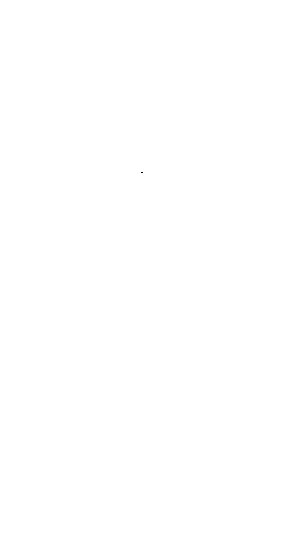

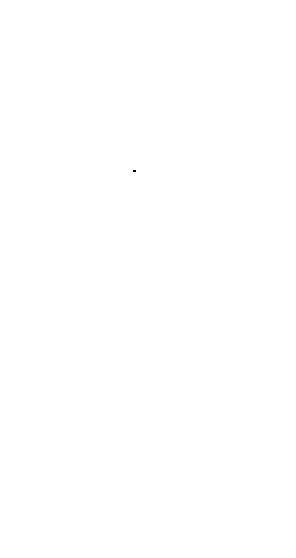

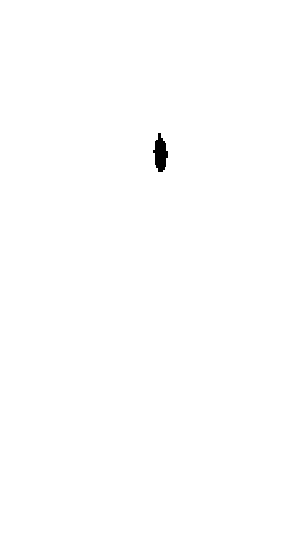

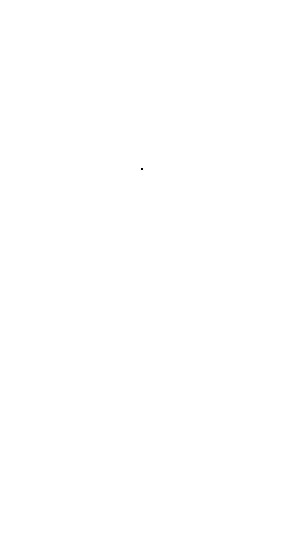

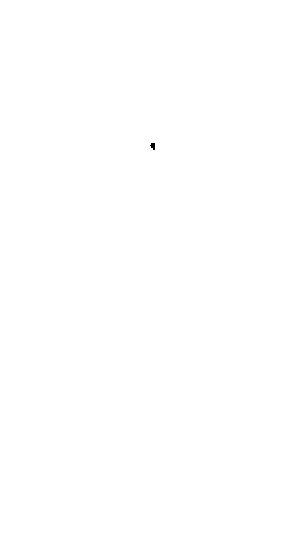

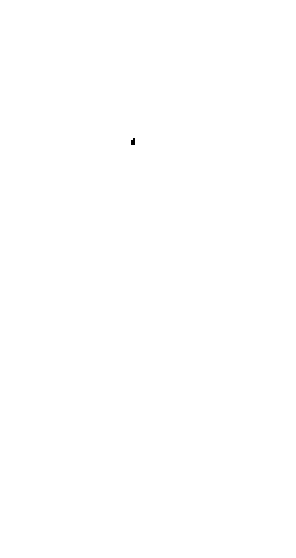

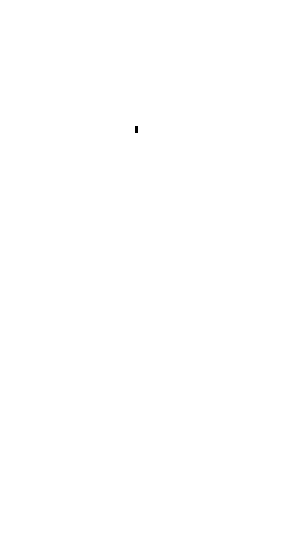

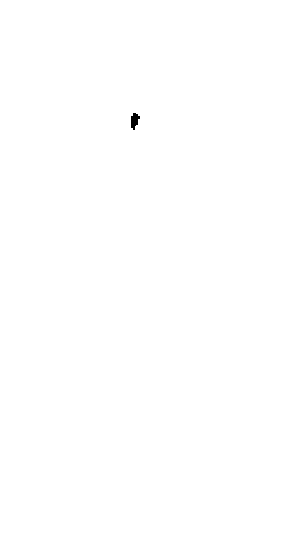

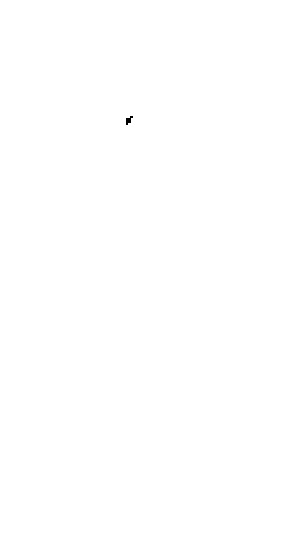

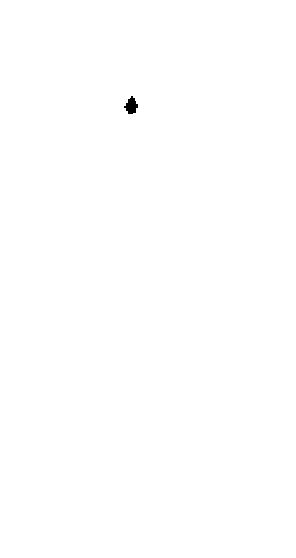

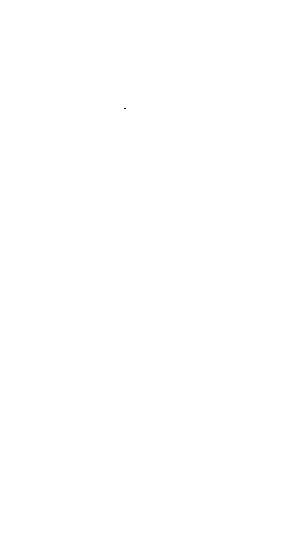

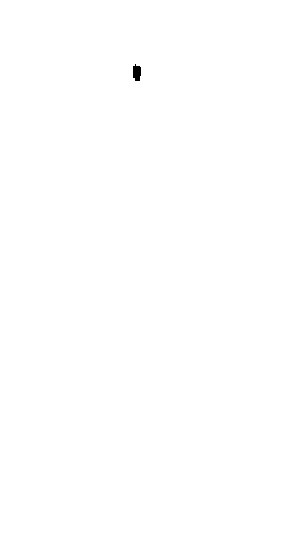

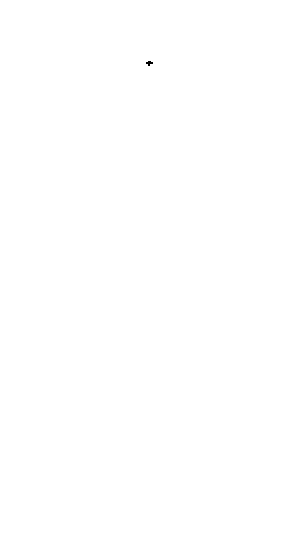

In [12]:
for i in range(1,54) : 
    x,y,z = np.where(array_1 == i) 
    new_mask_3D = np.zeros((168, 168, 324)) 
    
    for j in range(len(x)):
        new_mask_3D[x[j], y[j], z[j]] = i

    mip_imshow(new_mask_3D, 0, cmap='Greys', type = 'mask')

In [ ]:
#MASK 4D IMSHOW ET MASK BINAIRE 3D IMSHOW 

In [14]:
mask = sitk.ReadImage(mask_path)
mask_array = sitk.GetArrayFromImage(mask).transpose()
mask_array.shape

(168, 168, 324, 59)

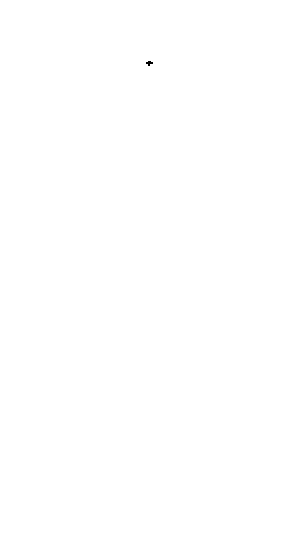

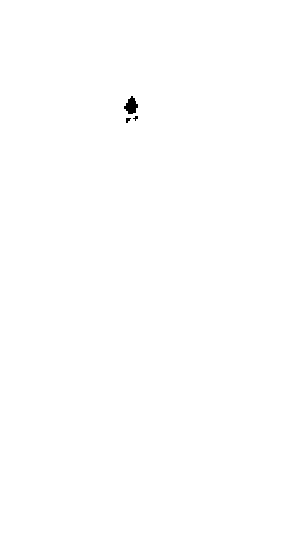

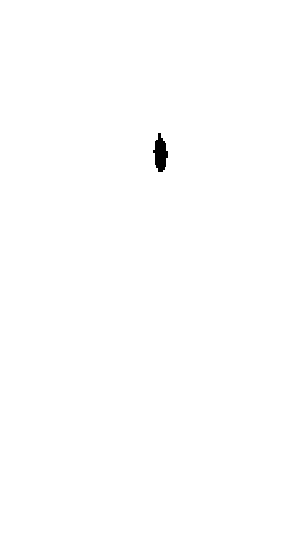

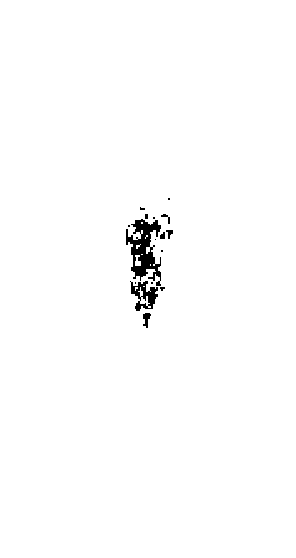

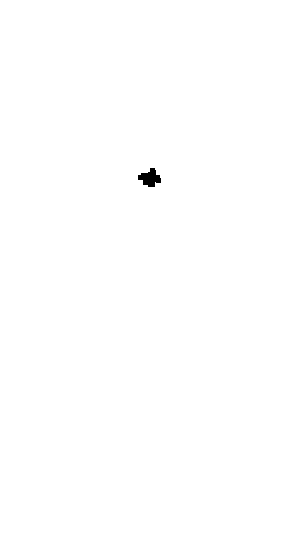

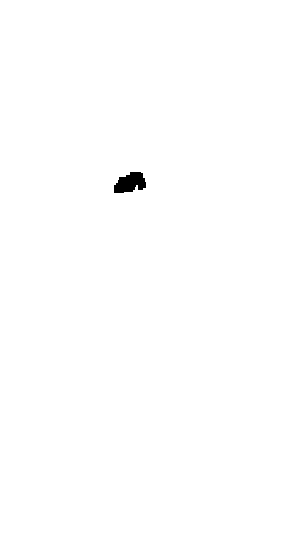

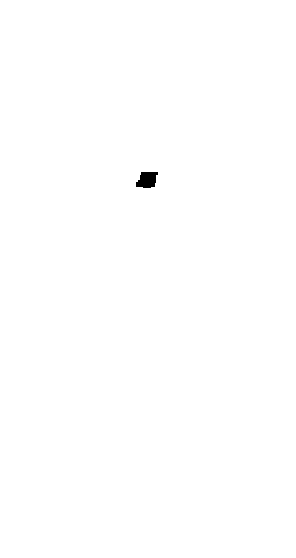

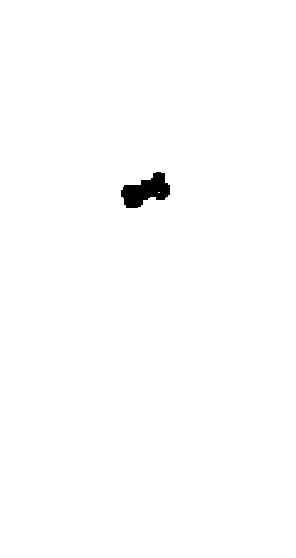

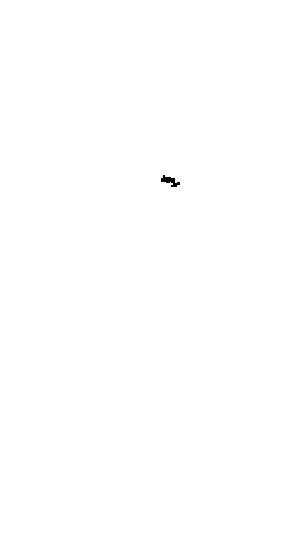

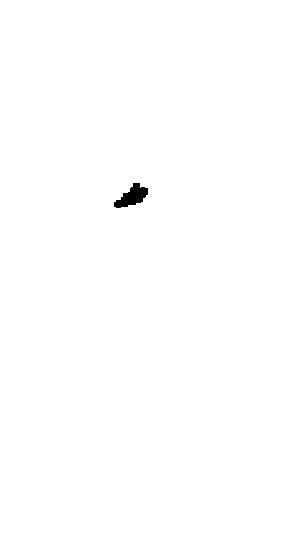

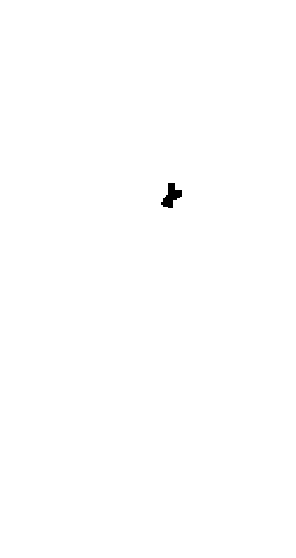

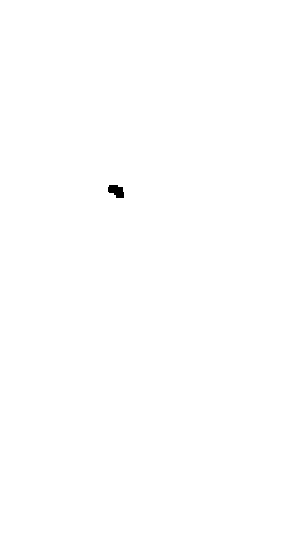

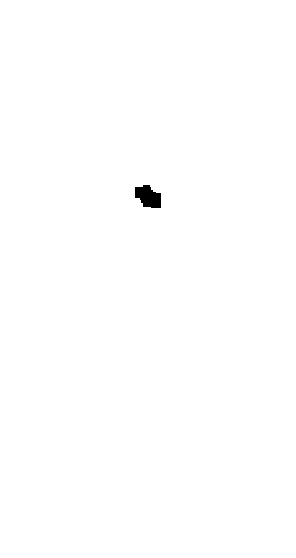

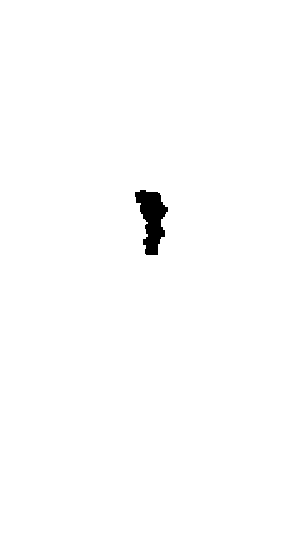

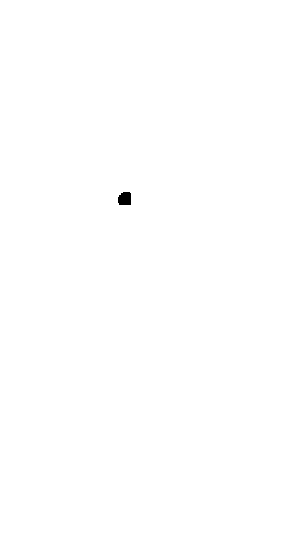

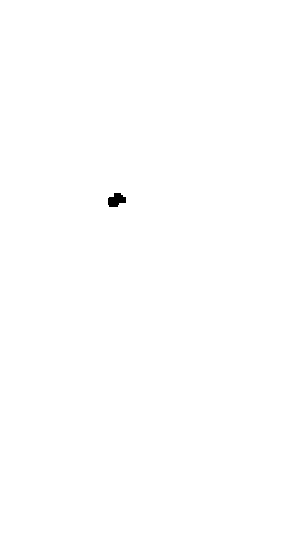

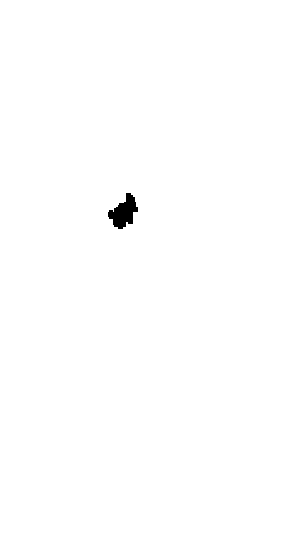

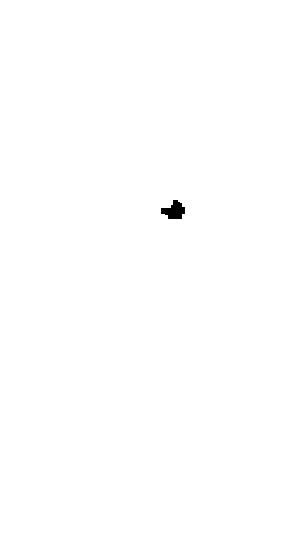

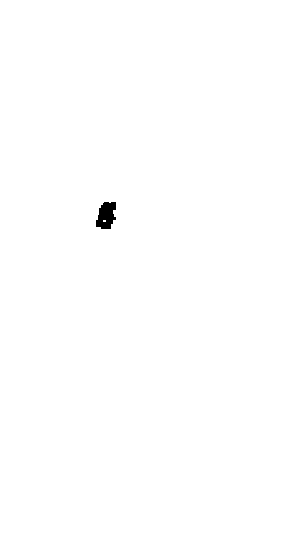

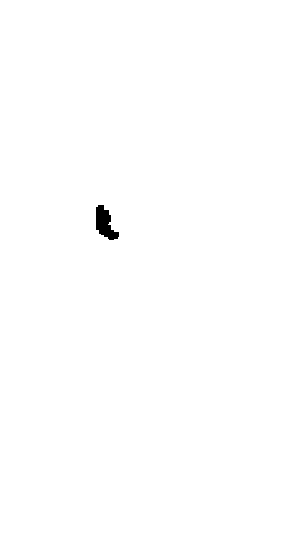

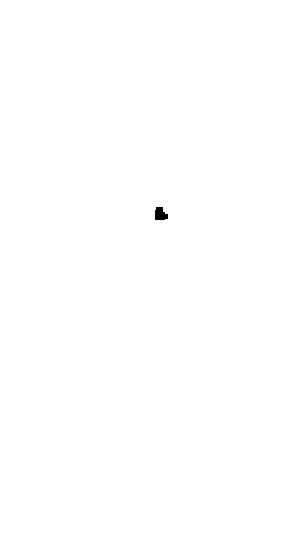

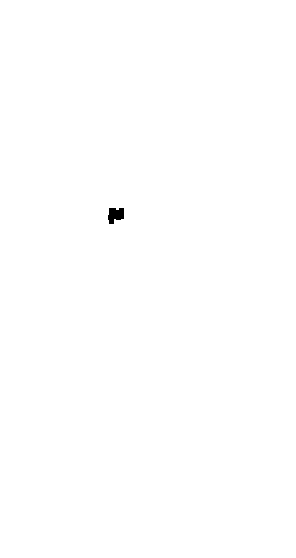

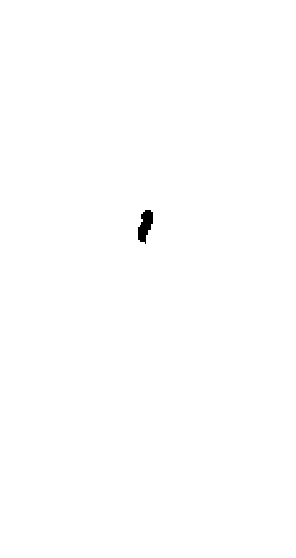

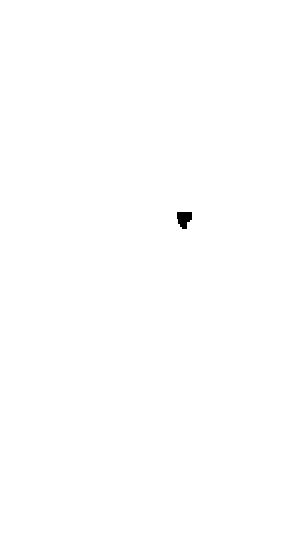

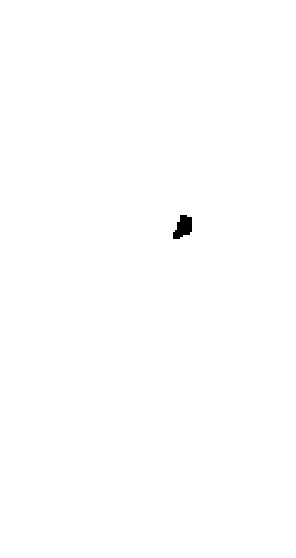

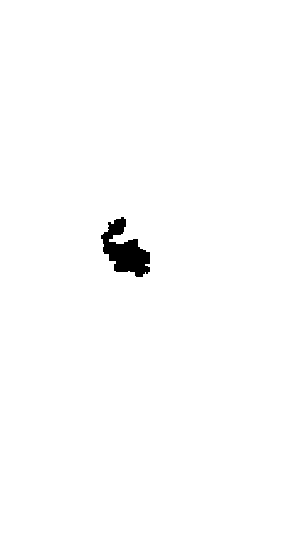

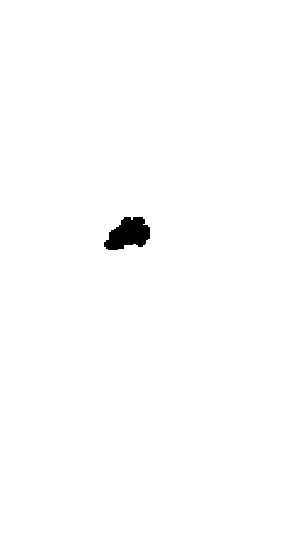

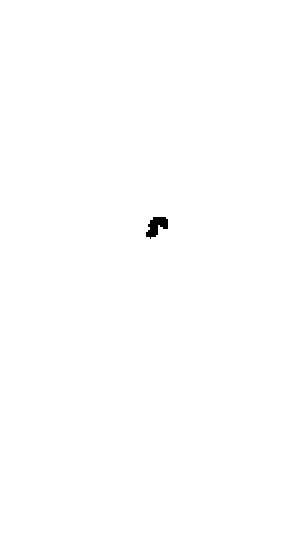

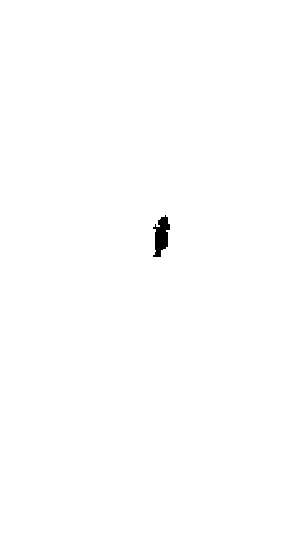

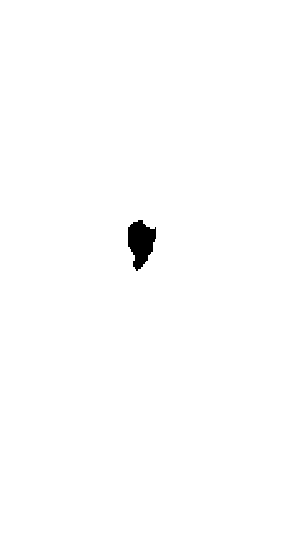

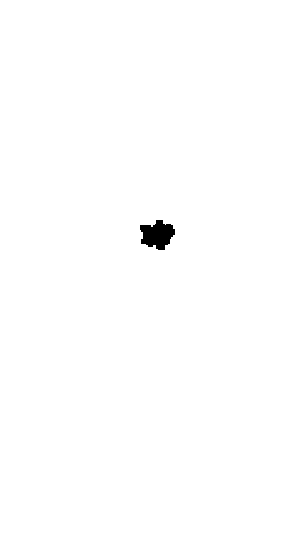

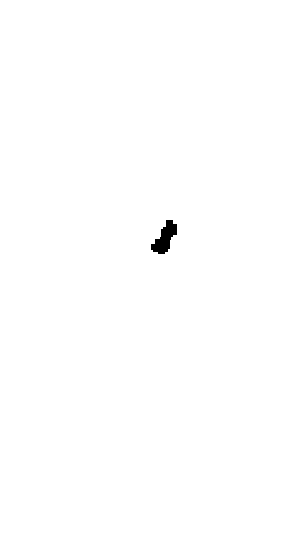

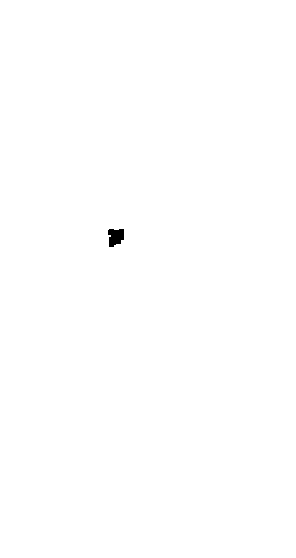

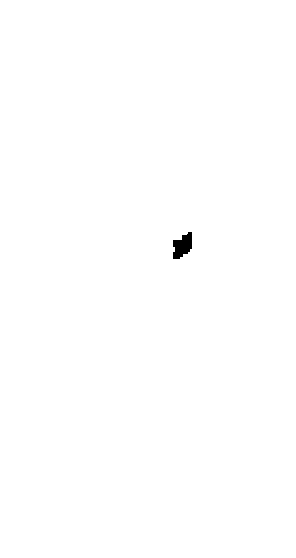

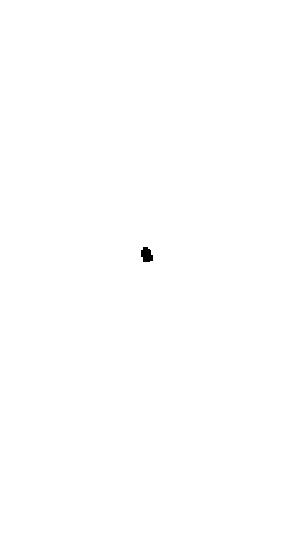

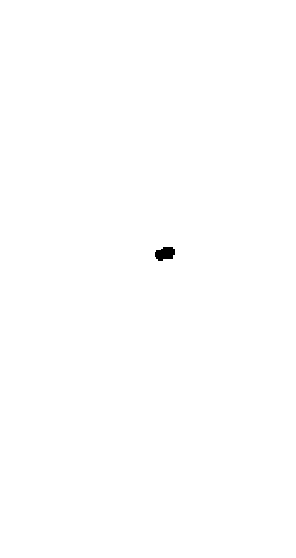

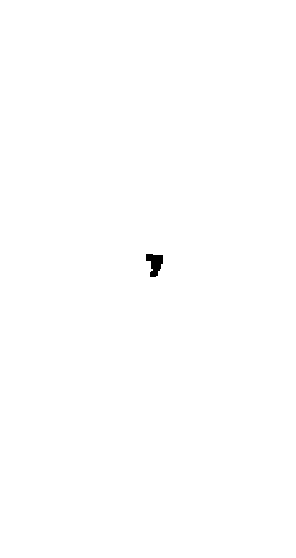

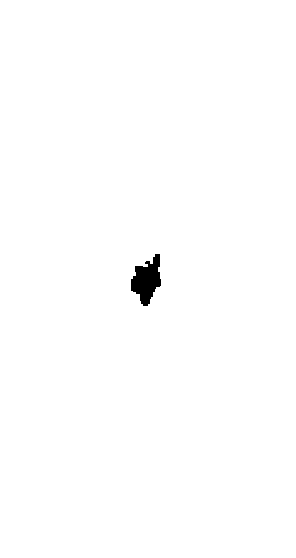

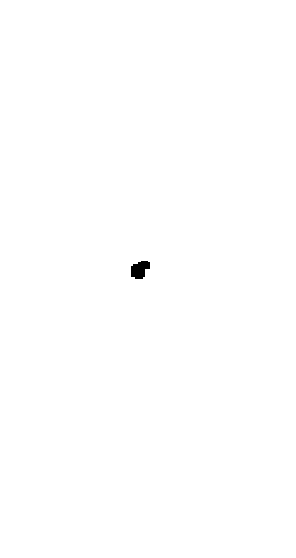

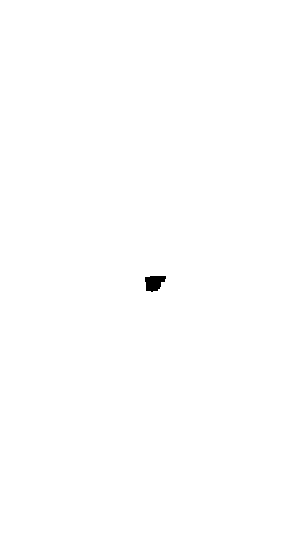

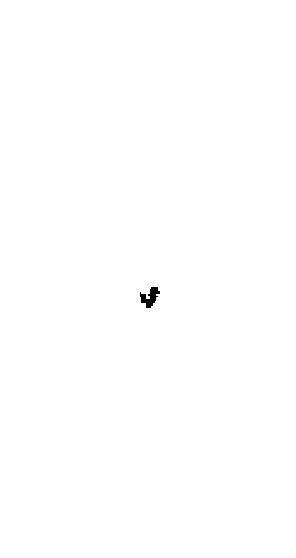

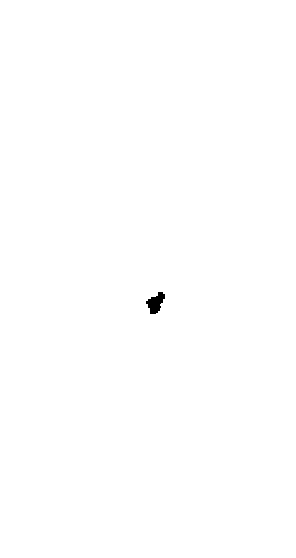

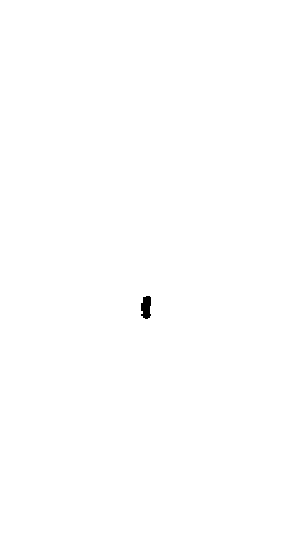

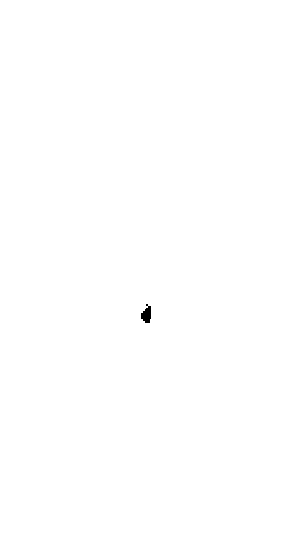

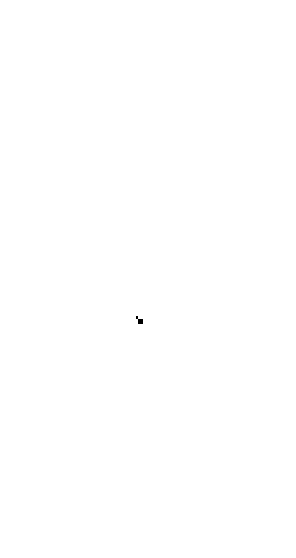

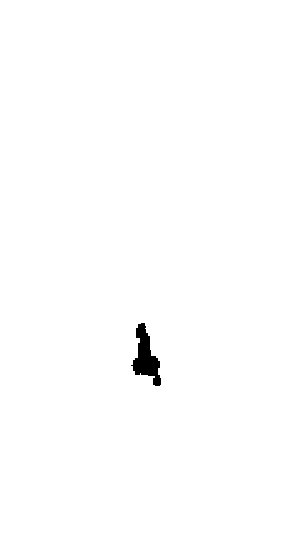

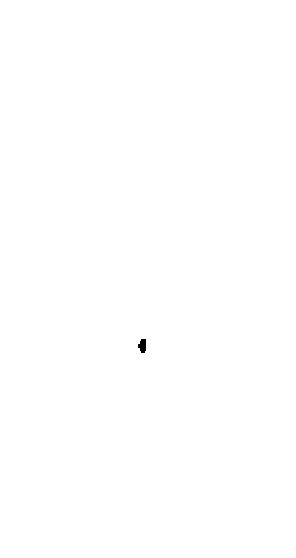

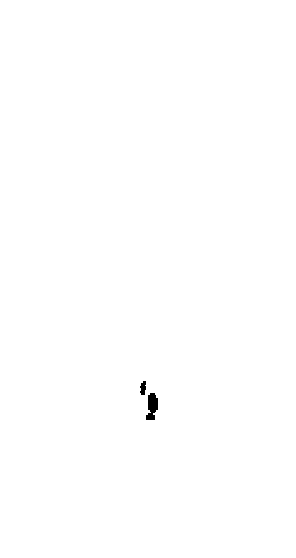

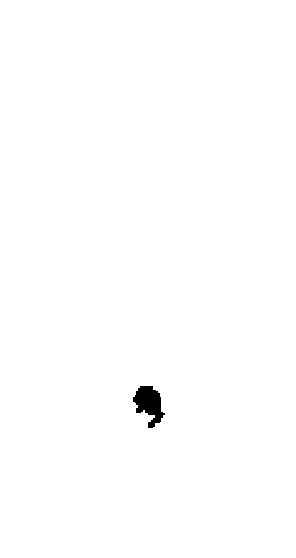

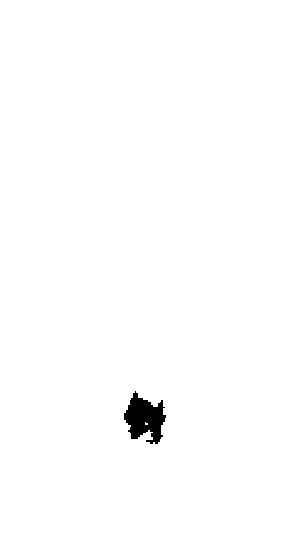

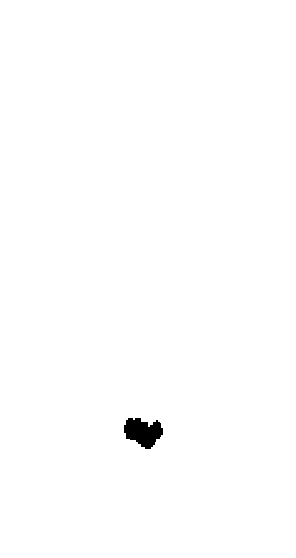

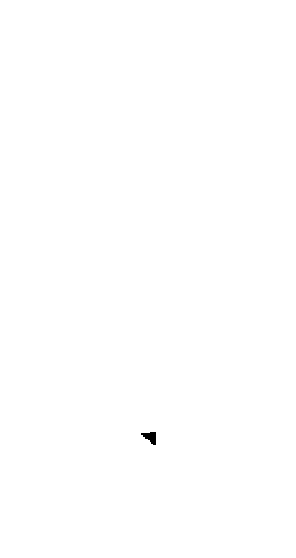

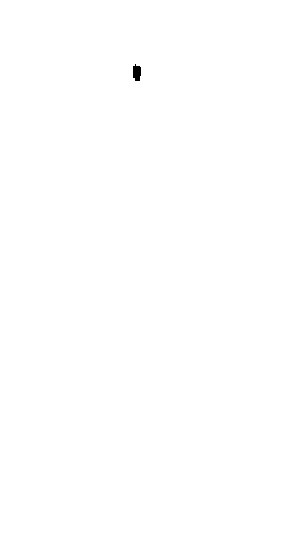

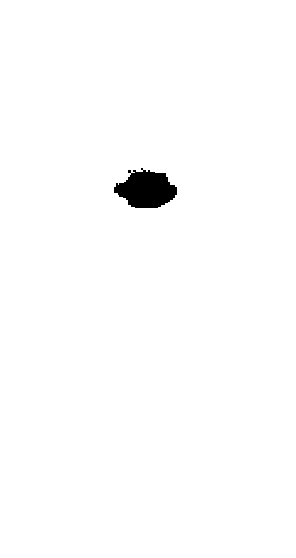

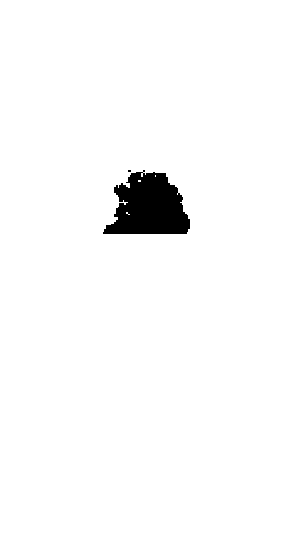

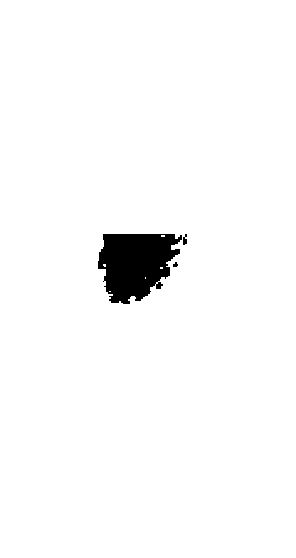

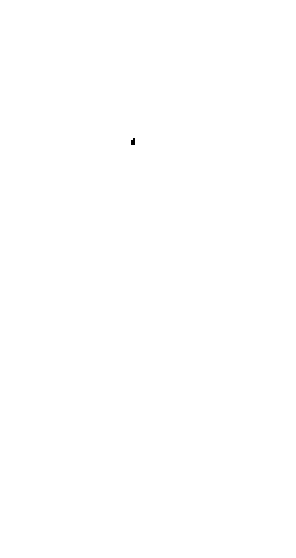

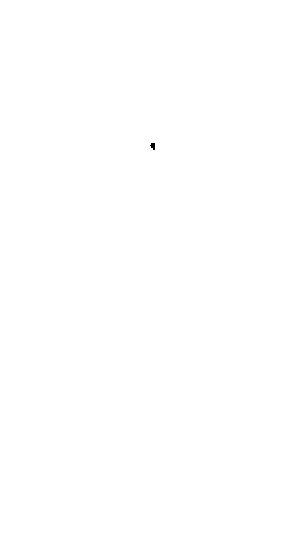

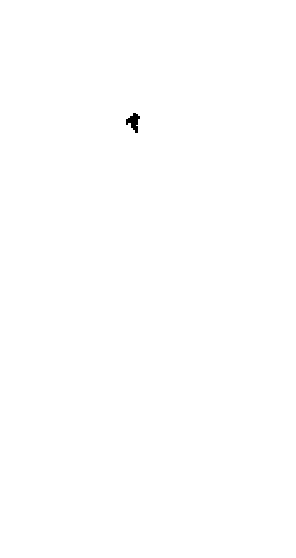

In [18]:
for i in range(59):
    mip_imshow(mask_array[:,:,:,i], 0, cmap='Greys', type = 'mask')

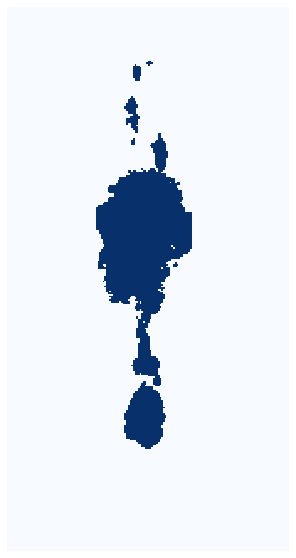

In [16]:
mip_imshow_4D(mask_array, 0, cmap = 'Blues')

In [13]:
mask_binaire = model.binary_mask

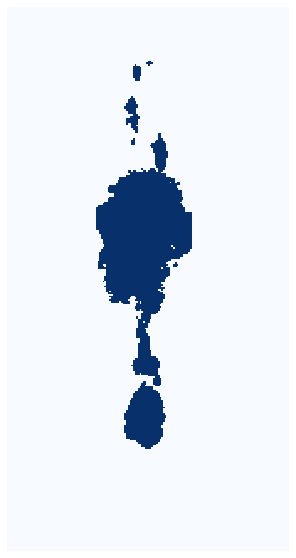

In [14]:
mip_imshow(mask_binaire, 0, cmap = 'Blues', type = 'mask')

In [7]:
create_mip_gif(mask_binaire, r'C:\Users\wendy\Documents\STAGE\post_processing\mip_binary_mask', 'mask_binaire', 'Blues', 1)

In [6]:
pet = sitk.ReadImage(pet_path)
pet_array = sitk.GetArrayFromImage(pet).transpose()
pet_array.shape

(168, 168, 324)

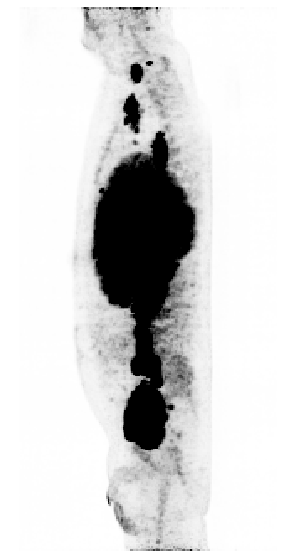

In [16]:
mip_imshow(pet_array, 0, 'Greys', 'tep')

In [ ]:
#superposer TEP et MIP 

In [8]:
#pet_array
binary_mask = model.binary_mask
directory = r'C:\Users\wendy\Documents\STAGE\post_processing\mip_connected_component'
create_mip_superpose_gif(array_1, pet_array, directory, 'test', cmap_mask = 'viridis' )

In [ ]:
#label_image

In [ ]:
#WATERSHED

In [20]:
ws = sitk.MorphologicalWatershedFromMarkers(model.pet_img, model.labelled_mask_img, markWatershedLine=True, fullyConnected= False)

In [21]:
array = sitk.GetArrayFromImage(ws).transpose()

In [22]:
array.shape

(169, 169, 255)

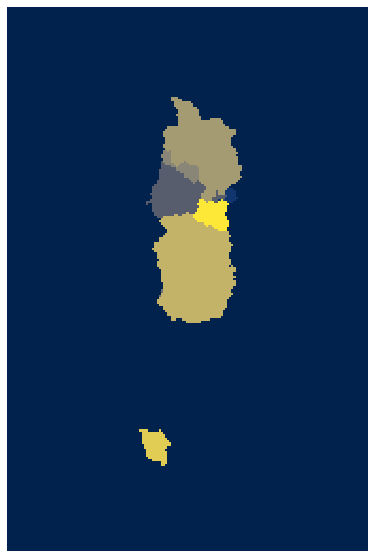

In [23]:
mip_imshow(array, 0)

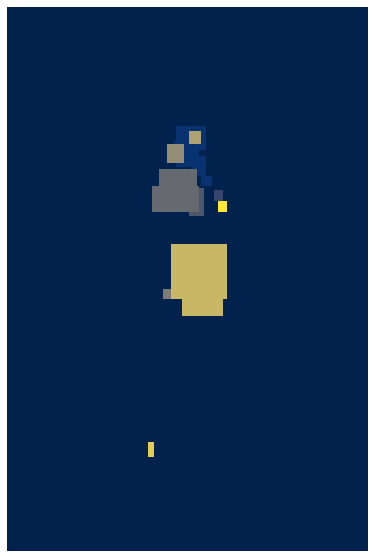

In [41]:
mip_imshow(model.labelled_mask, 0)